Question:

Consider a steel rod that is subjected to a temperature of $100^{\circ}C$ on the left end and $25^{\circ}C$ on the right end. If the rod is of length $0.05m$, use the explicit method to find the temperature distribution of the rod from $t=0$ to $t=9$ seconds. Use $\Delta x=0.01m$ and $\Delta t=3s$.

$k=54$, $\rho = 7800$ and $C = 490$. The initial temperature of the rod is $20^{\circ}C$.

Question from: https://www.youtube.com/watch?v=p0V1eSlM2xo

Conduction Equation used: $$\alpha \frac{\partial^2 T}{\partial x^2} = \frac{\partial T}{\partial t}$$

Discretization: $$T_i^{j+1} = T_i^j + \lambda (T_{i+1}^j - 2T_i^j + T_{i-1}^j)$$

where $\lambda = \alpha \frac{\Delta t}{\Delta x^2}$

In [30]:
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#Initializing the variables
x=0.05
dx=0.01
nx=6

nt=9
dt=3

k=54
rho=7800
C=490
lamda=k/(C*rho)*dt/dx**2
print(lamda)

T_init=20*np.ones(nx)
xarr=np.linspace(0,x,nx)
print(xarr)

0.423861852433281
[0.   0.01 0.02 0.03 0.04 0.05]


In [32]:
#Boundary conditions
Tleft=100
Tright=25
T_init[0]=Tleft
T_init[-1]=Tright
print(T_init)

[100.  20.  20.  20.  20.  25.]


[100.          53.90894819  20.          20.          22.11930926
  25.        ]
[100.          59.0724772   34.3727096   20.89829435  22.44202982
  25.        ]
[100.          65.95080358  39.13070824  27.26391553  22.87192522
  25.        ]


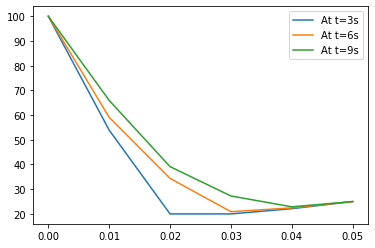

In [33]:
labels={3:'At t=3s', 6:'At t=6s', 9:'At t=9s'}

def conduction(T):
    for n in range(3,nt+1,dt):
        Tn=T.copy()
        for i in range(1,nx-1):
            #Tn=T.copy()
            T[i]=Tn[i] + lamda*(Tn[i+1]-2*Tn[i]+Tn[i-1])
            T[0]=Tleft
            T[-1]=Tright
        plt.plot(xarr,T, label=labels[n])
        plt.legend()
        print(T)
    
conduction(T_init)  